## ---------------------------------------------실습과제-------------------------------------------------

In [25]:
## 쥬피터 랩이 있다.

In [26]:
import pandas as pd 
df = pd.read_csv('./한국자산관리공사_국유부동산 매각현황_20221231.csv', encoding = 'cp949')
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


### 1. 매각 금액이 가장 많은 팀과 하위 팀의 차이 확인하기

In [27]:
df['팀(부점)명'] = df['팀명'] + '(' +df['부점명']+')'
df1 = df.groupby('팀(부점)명').agg({'대장금액(원)':'sum'})
df1 = df1.sort_values(by = '대장금액(원)', ascending = False)
df1 = df1.reset_index()
df1.index = df1.index + 1
df1['대장금액(억원)'] = round(df1['대장금액(원)'] / 100000000,1)
max = df1['대장금액(원)'].max()
max_df1 = df1[df1['대장금액(원)']==max]
max_df1

,팀(부점)명,대장금액(원),대장금액(억원)
1,국유재산3팀(서울서부지역본부),643469975030,6434.7


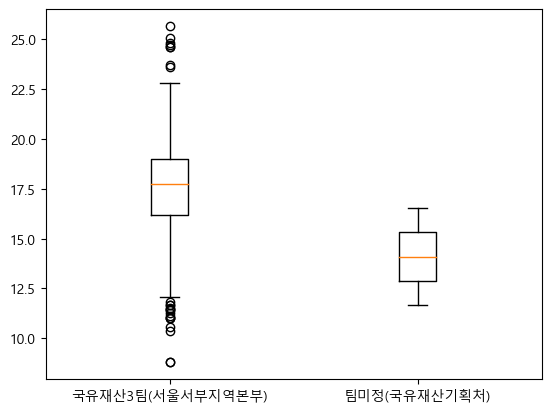

In [32]:
import matplotlib.pyplot as plt
import numpy as np
log_data1 = np.log1p(df[df['팀(부점)명'] == '국유재산3팀(서울서부지역본부)']['대장금액(원)'])
log_data2 = np.log1p(df[df['팀(부점)명'] == '팀미정(국유재산기획처)']['대장금액(원)'])
combined_data = [log_data1, log_data2]
plt.rc('font', family = 'Malgun Gothic')
plt.boxplot(combined_data, labels = ['국유재산3팀(서울서부지역본부)', '팀미정(국유재산기획처)'])
plt.show()

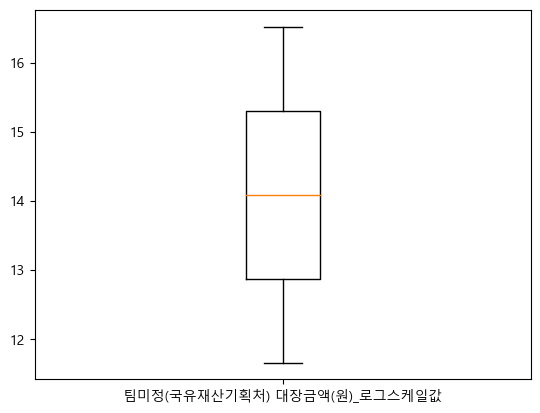

In [29]:
import matplotlib.pyplot as plt
import numpy as np
log_data = np.log1p(df[df['팀(부점)명'] == '팀미정(국유재산기획처)']['대장금액(원)'])
plt.rc('font', family = 'Malgun Gothic')
plt.boxplot(log_data, labels = ['팀미정(국유재산기획처) 대장금액(원)_로그스케일값'])
plt.show()

In [6]:
min = df1['대장금액(원)'].min()
min_df1 = df1[df1['대장금액(원)']==min]
min_df1

,팀(부점)명,대장금액(원),대장금액(억원)
112,팀미정(국유재산기획처),15087644,0.2


In [7]:
len(df[df['팀(부점)명'] == '국유재산3팀(서울서부지역본부)'])

878

In [9]:
df[df['팀(부점)명'] == '팀미정(국유재산기획처)']

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,팀(부점)명
126257,2021,제주특별자치도,제주특별자치도 서귀포시 토평동 1922-1,건물,확인불가,7.0,116490,처분(매각수의),2021-07-26,국유재산기획처,팀미정,팀미정(국유재산기획처)
126258,2021,제주특별자치도,제주특별자치도 서귀포시 토평동 1922-1,건물,확인불가,50.0,14971154,처분(매각수의),2021-07-26,국유재산기획처,팀미정,팀미정(국유재산기획처)


### 2. 연도별 매각금액 추이 확인하기

In [29]:
df2 = df[['대장금액(원)','계약일자']]
df2['계약연도'] = df2['계약일자'].astype(str).str[:4]
df2['계약연도'] = df2['계약연도'].astype(int)
df2



C:\Users\user\AppData\Local\Temp\ipykernel_17260\552668796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['계약연도'] = df2['계약일자'].astype(str).str[:4]
C:\Users\user\AppData\Local\Temp\ipykernel_17260\552668796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['계약연도'] = df2['계약연도'].astype(int)


,대장금액(원),계약일자,계약연도
0,9968000,2014-01-01,2014
1,13770000,2014-01-01,2014
2,1075200,2014-01-01,2014
3,1884160,2014-01-01,2014
4,23797800,2014-01-01,2014
...,...,...,...
141312,29952000,2022-11-09,2022
141313,56062200,2022-12-29,2022
141314,132640400,2022-12-29,2022
141315,32160000,2022-08-04,2022


In [30]:
df2 = df2.groupby('계약연도').agg({'대장금액(원)': 'count'}) #'sum으로도 진행'
df2 = df2.reset_index()
df2.index = df2.index + 1

In [31]:
df2 = df2[df2['계약연도'] >= 2014]
df2['대장금액(억원)'] = round(df2['대장금액(원)'] / 100000000,2)
df2

,계약연도,대장금액(원),대장금액(억원)
13,2014,17155,0.0
14,2015,17228,0.0
15,2016,18853,0.0
16,2017,23306,0.0
17,2018,14178,0.0
18,2019,14700,0.0
19,2020,12331,0.0
20,2021,9235,0.0
21,2022,14128,0.0


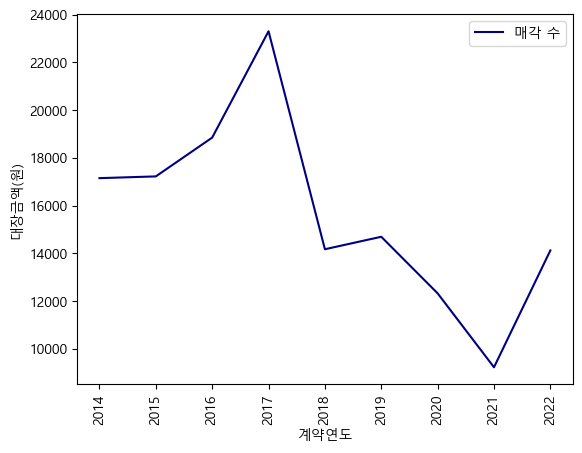

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='Malgun Gothic')
plt.xticks(rotation=90)

sns.lineplot(data=df2, x='계약연도', y='대장금액(원)', label='매각 수', c = 'navy')
plt.legend()
plt.show()

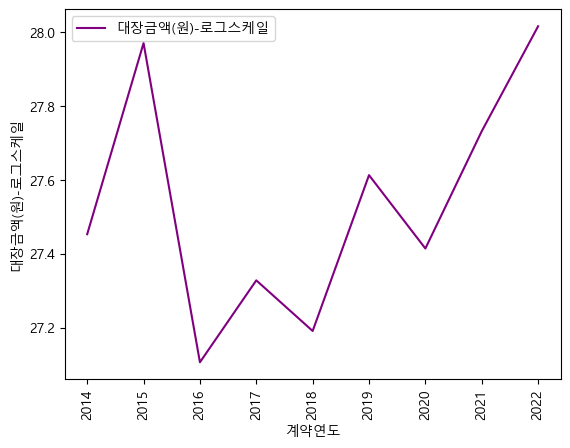

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='Malgun Gothic')
plt.xticks(rotation=90)

df2['대장금액(원)-로그스케일'] = np.log1p(df2['대장금액(원)'])

sns.lineplot(data=df2, x='계약연도', y='대장금액(원)-로그스케일', label='대장금액(원)-로그스케일', c = 'purple')
plt.legend()
plt.show()

### 3. 상위 5개 지역별 매각 면적 확인하기

In [67]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [68]:
df3 = df.groupby('지역구분').agg({'대장면적(제곱미터)' : 'count'}).sort_values(by = '대장면적(제곱미터)', ascending = False).head(8) #sum으로도 진행

In [61]:
df3['대장면적(km^2)'] = round(df3['대장면적(제곱미터)']/1000000,1)

In [69]:
df3

,대장면적(제곱미터)
지역구분,
경기도,27202
경상남도,15158
경상북도,13712
전라남도,13123
전라북도,12889
강원도,12061
부산광역시,10751
충청남도,8659


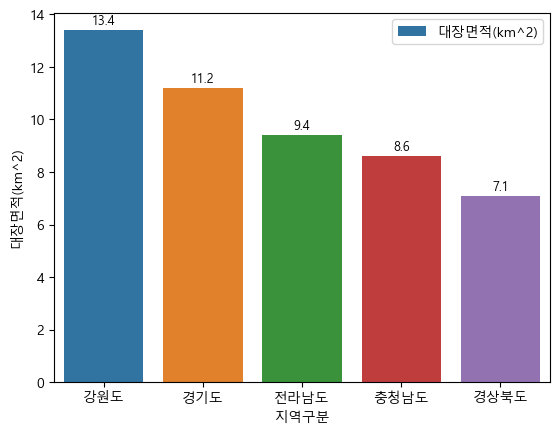

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='Malgun Gothic')
df3 = df3.reset_index()
df3.index = df3.index + 1

ax = sns.barplot(data=df3, x='지역구분', y='대장면적(km^2)', label='대장면적(km^2)')
for i, v in enumerate(df3['대장면적(km^2)']):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=9, color='black')

plt.legend()
plt.show()

### 4. 계약 일자 정보 기준으로, 매각이 많은 때의 특징 알아보기

In [70]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [71]:
df4 = df[['대장금액(원)','계약일자']]
df4['계약(월)'] = df['계약일자'].astype(str).str[5:7]
df4

C:\Users\user\AppData\Local\Temp\ipykernel_17260\722157678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['계약(월)'] = df['계약일자'].astype(str).str[5:7]


,대장금액(원),계약일자,계약(월)
0,9968000,2014-01-01,01
1,13770000,2014-01-01,01
2,1075200,2014-01-01,01
3,1884160,2014-01-01,01
4,23797800,2014-01-01,01
...,...,...,...
141312,29952000,2022-11-09,11
141313,56062200,2022-12-29,12
141314,132640400,2022-12-29,12
141315,32160000,2022-08-04,08


In [123]:
df4 = df4.groupby('계약(월)').agg({'대장금액(원)' : 'count'})
df4

,대장금액(원)
계약(월),
01,10811
02,9288
03,11997
04,12063
05,11751
06,14370
07,12074
08,11216
09,10508


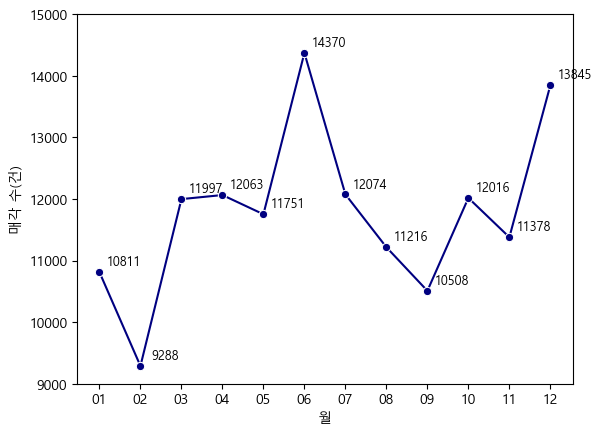

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(data = df4, x = '계약(월)', y= '대장금액(원)', marker='o', color='navy')
plt.xlabel('월')
plt.ylabel('매각 수(건)')
plt.ylim(9000,15000)
for i, v in enumerate(df4['대장금액(원)']):
    ax.text(i + 0.6, v + 60, str(v), ha='center', va='bottom', fontsize=9, color='black')
plt.show()


In [16]:
# 한국에서는 보통 6월과 12월에 일정이 끝난다. 따라서 6월과 12월에 매각이 이루어졌다는 가설을 세워볼 수 있다.

### 선택과제 1. 처분 구분별 비율 확인하기

In [17]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [164]:
import matplotlib.pyplot as plt

df5 = df.groupby('처분구분명').agg({'대장금액(원)' : 'count'})
df5['퍼센티지'] = (df5['대장금액(원)'] / df5['대장금액(원)'].sum()) * 100
df6 = df5[df5['퍼센티지'] <= 2]

threshold = 2
small_values = df5[df5['퍼센티지'] < threshold]
df5.loc['기타'] = small_values.sum()
df5 = df5.drop(small_values.index)
df5

,대장금액(원),퍼센티지
처분구분명,,
처분(매각수의),124597.0,88.168444
처분(매각입찰),8834.0,6.251194
처분(무상관리전환),4289.0,3.035021
기타,3597.0,2.545341


In [170]:
df6

,대장금액(원),퍼센티지
처분구분명,,
처분(무상귀속),706,0.499586
처분(무상양여),686,0.485433
처분(사용승인),2090,1.478945
처분(유상관리전환),114,0.080670
처분(유상양여),1,0.000708


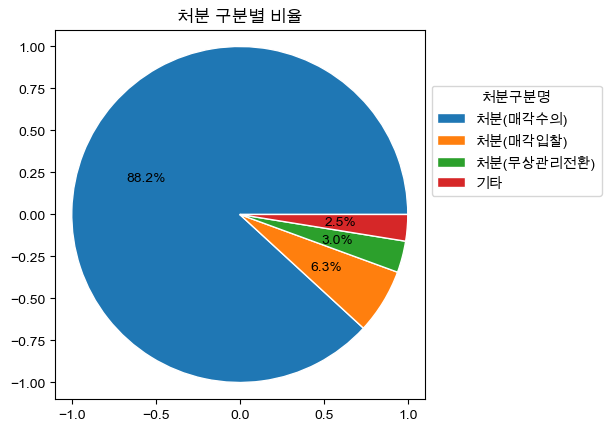

In [173]:
import matplotlib.pyplot as plt

plt.rc('font', family='Arial Unicode MS')
fig, ax = plt.subplots()
ax.pie(df5['퍼센티지'], autopct='%1.1f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
ax.legend(df5.index, title='처분구분명', loc='center left', bbox_to_anchor=(1, 0.7))
plt.title('처분 구분별 비율')

plt.show()

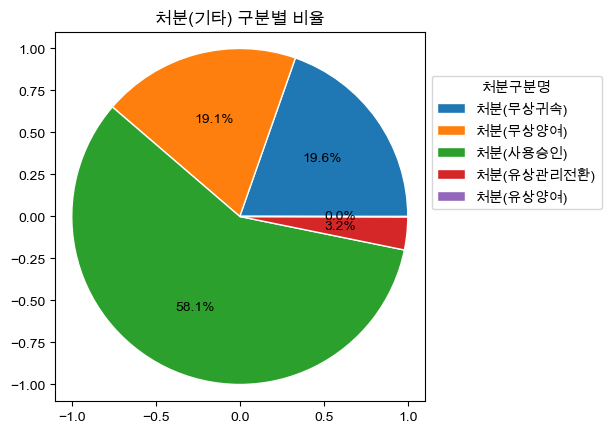

In [174]:
import matplotlib.pyplot as plt

plt.rc('font', family='Arial Unicode MS')
fig, ax = plt.subplots()
ax.pie(df6['퍼센티지'], autopct='%1.1f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
ax.legend(df6.index, title='처분구분명', loc='center left', bbox_to_anchor=(1, 0.7))
plt.title('처분(기타) 구분별 비율')

plt.show()